In [1]:
# import packages and suppress warnings

suppressPackageStartupMessages(library(pathfindR))
suppressPackageStartupMessages(library(readxl))
suppressPackageStartupMessages(library(biomaRt))
suppressPackageStartupMessages(library(limma))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(patchwork))

In [2]:
# define directories

pathfindR_dir = "/Volumes/Expansion/Thesis Work/Results/Transfer Learning/Drugs with same pathways/EGFRi/Expression_Mutation/pathfindR/GDSC_PDX_TCGA_First_Strategy/"
gdsc_dir = "/Volumes/Expansion/Thesis Work/Supplementary Files/GDSC/"
exp_dir = "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/"

In [3]:
# create directory for pathfindR analysis and change to that directory

dir.create(pathfindR_dir, showWarnings = FALSE)
setwd(pathfindR_dir)
getwd()

[1] "/Volumes/Expansion/Thesis Work/Results/Transfer Learning/Drugs with same pathways/EGFRi/Expression_Mutation/pathfindR/GDSC_PDX_TCGA_First_Strategy"

In [4]:
# read DEGs table of cetuximab (EGFRi)

input_df <- read.delim(paste0(pathfindR_dir, "/GDSC_Expression_Mutation_Filtered_DEGs_Table_EGFRi_Cetuximab.tsv"))
input_df <- input_df[,c("symbol","logFC","adj.P.Val")]

head(input_df, 3)

,symbol,logFC,adj.P.Val
,<chr>,<dbl>,<dbl>
1,EGFR,-1.2535545,3.889121e-17
2,FAM83B,-0.8618164,1.164861e-15
3,CDH3,-1.9799433,1.048172e-13


## Testing input

The input looks OK

## Processing input. Converting gene symbols,
          if necessary (and if human gene symbols provided)

Number of genes provided in input: 751

Number of genes in input after p-value filtering: 560

pathfindR cannot handle p values < 1e-13. These were changed to 1e-13



Could not find any interactions for 291 (51.96%) genes in the PIN

Final number of genes in input: 269

## Performing Active Subnetwork Search and Enrichment

## Processing the enrichment results over all iterations

## Annotating involved genes and visualizing enriched terms

## Creating HTML report



processing file: results.Rmd



1/3        
2/3 [setup]
3/3        


output file: results.knit.md




/opt/homebrew/bin/pandoc +RTS -K512m -RTS results.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output pandoc103303481719f.html --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/latex-div.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/table-classes.lua --embed-resources --standalone --variable bs3=TRUE --section-divs --template /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable theme=bootstrap --mathjax --variable 'mathjax-url=https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' --include-in-header /var/folders/fg/9tfxwbns2z9bny6_29d9jxyc0000gn/T//RtmplH4XCN/rmarkdown-str103301ee4a2e1.html 



Output created: results.html



processing file: enriched_terms.Rmd



1/4        
2/4 [setup]
3/4        
4/4 [table]


output file: enriched_terms.knit.md




/opt/homebrew/bin/pandoc +RTS -K512m -RTS enriched_terms.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output pandoc10330591b4ae2.html --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/latex-div.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/table-classes.lua --embed-resources --standalone --variable bs3=TRUE --section-divs --template /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable theme=bootstrap --mathjax --variable 'mathjax-url=https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' --include-in-header /var/folders/fg/9tfxwbns2z9bny6_29d9jxyc0000gn/T//RtmplH4XCN/rmarkdown-str10330495c84ee.html 


Output created: enriched_terms.html



processing file: conversion_table.Rmd



1/6                              
2/6 [setup]                      
3/6                              
4/6 [converted_tbl, table1]      
5/6                              
6/6 [gene_wo_interaction, table2]


output file: conversion_table.knit.md




/opt/homebrew/bin/pandoc +RTS -K512m -RTS conversion_table.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output pandoc1033035e0655.html --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/latex-div.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/table-classes.lua --embed-resources --standalone --variable bs3=TRUE --section-divs --template /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable theme=bootstrap --mathjax --variable 'mathjax-url=https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' --include-in-header /var/folders/fg/9tfxwbns2z9bny6_29d9jxyc0000gn/T//RtmplH4XCN/rmarkdown-str10330192bb0b4.html


Output created: conversion_table.html

Plotting the enrichment bubble chart

Found 170 enriched terms



You may run:


- cluster_enriched_terms() for clustering enriched terms


- visualize_terms() for visualizing enriched term diagrams





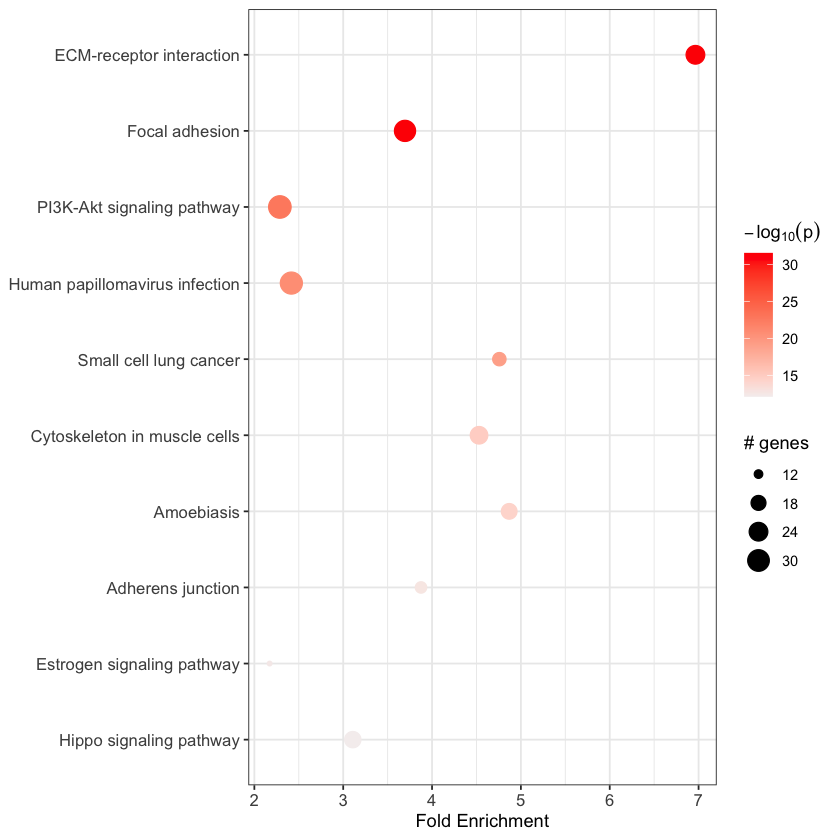

In [5]:
# run pathfindR

output_df <- run_pathfindR(input_df, 
                            output_dir = paste(pathfindR_dir,"KEGG_figure8",sep="/"),
                            pin_name_path = "KEGG",
                            adj_method = "fdr",
                            enrichment_threshold = 0.05,
                            min_gset_size = 5,
                            max_gset_size = 500,
                            iterations = 25,
                            gene_sets= "KEGG")

Plotting the enrichment bubble chart

Plotting the enrichment bubble chart



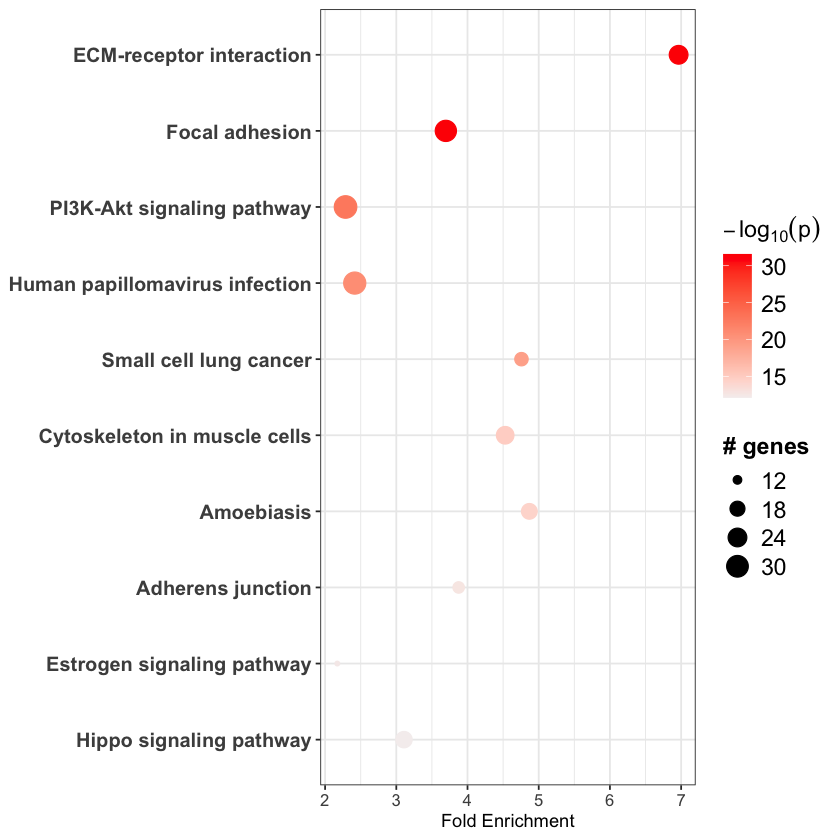

In [6]:
# Modify y-label size, x-label size, and legend visuals

gg_list <- enrichment_chart(
    result_df = output_df,
    top_terms = 10
) + 
#ggplot2::ggtitle("EGFR signaling inhibitors (Cetuximab)\nTop 10 KEGG Pathway Enrichment Terms\n") +  
#ggplot2::theme(
#    plot.title = element_text(size = 12, face = "bold", hjust = 0.5)  
#) +
ggplot2::scale_x_continuous(
    breaks = c(2, 3, 4, 5, 6, 7, 8, 9),  # Custom x-axis tick values
    labels = c("2", "3", "4", "5", "6","7","8","9")  # Optional: Add custom labels for ticks
)
#ggplot2::theme(
#    plot.title = ggplot2::element_text(size = 24, face = "bold", hjust = 0.5),  
#    axis.title.x = ggplot2::element_blank(),                                    
#    axis.text.y = ggplot2::element_text(size = 12, face = "bold"),              
#    axis.text.x = ggplot2::element_text(size = 12, face = "bold"),              
#    legend.title = ggplot2::element_text(size = 20, face = "bold"),             
#    legend.text = ggplot2::element_text(size = 18),                             
#    legend.key.size = ggplot2::unit(1.2, "cm")                                 
#)

fold_enrichment_figure <- enrichment_chart(
    result_df = output_df,
    top_terms = 10
) + 
#ggplot2::ggtitle("EGFR signaling inhibitors (Cetuximab)\nTop 10 KEGG Pathway Enrichment Terms\n") +  
ggplot2::theme(
    #plot.title = element_text(size = 12, face = "bold", hjust = 0.5)  
    axis.text.y = ggplot2::element_text(size = 12, face = "bold"),              
    legend.title = ggplot2::element_text(size = 14, face = "bold"),             
    legend.text = ggplot2::element_text(size = 14),                             
    #legend.key.size = ggplot2::unit(1, "cm")  
) +
ggplot2::scale_x_continuous(
    breaks = c(2, 3, 4, 5, 6, 7, 8),  # Custom x-axis tick values
    labels = c("2", "3", "4", "5", "6", "7", "8")  # Optional: Custom labels
)

print(fold_enrichment_figure)

In [7]:
# cluster enriched terms

pathfindR_output_clustered <- cluster_enriched_terms(output_df, 
                                                     plot_dend = FALSE, 
                                                     plot_clusters_graph = FALSE)

# knitr::kable(head(pathfindR_output_clustered, 2))

The maximum average silhouette width was 0.15 for k = 40 





In [8]:
# show output of pathfindR clustered table

head(pathfindR_output_clustered, 3)

,ID,Term_Description,Fold_Enrichment,occurrence,support,lowest_p,highest_p,Up_regulated,Down_regulated,Cluster,Status
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>
1,hsa04512,ECM-receptor interaction,6.964482,25,0.0937500,2.734808e-32,2.707252e-27,"COL1A2, COL6A3, ITGA4","LAMA3, LAMA5, LAMB1, LAMB2, LAMB3, LAMC1, LAMC2, COL4A1, COL4A2, COL4A5, THBS1, ITGB1, ITGA6, SDC1, SDC4, ITGB6, ITGB5, CD44, ITGA2, AGRN, DSPP",1,Representative
2,hsa04510,Focal adhesion,3.695659,25,0.4193548,2.734808e-32,2.707252e-27,"ITGA4, FYN, COL1A2, COL6A3","ITGB1, ITGB5, ITGB6, ITGA6, ITGA2, ACTN1, PTK2, CAPN2, COL4A1, COL4A2, COL4A5, LAMA3, LAMA5, LAMB1, LAMB2, LAMB3, LAMC1, LAMC2, THBS1, CCND1, EGFR, MET, VEGFC, JUN, EMP1",1,Member
3,hsa04151,PI3K-Akt signaling pathway,2.287051,25,0.2812500,1.537414e-23,4.510997e-20,"PIK3CG, ITGA4, COL1A2, COL6A3, MYB, PIK3AP1","EGFR, EPHA2, FGFR3, MET, CCND1, EFNA1, VEGFC, GNG12, ITGA6, ITGA2, ITGB1, ITGB5, ITGB6, COL4A1, COL4A2, COL4A5, LAMA3, LAMA5, LAMB1, LAMB2, LAMB3, LAMC1, LAMC2, THBS1, PTK2, SGK1",1,Member


# GDSC ###

In [9]:
# select significant terms

terms_significant <- c("ECM-receptor interaction",
                       "Focal adhesion",
                       "PI3K-Akt signaling pathway",
                       "Cytoskeleton in muscle cells",
                       "Adherens junction",
                       "Estrogen signaling pathway",
                       "Hippo signaling pathway",
                       "Chemokine signaling pathway",
                       "Regulation of actin cytoskeleton",
                       "MAPK signaling pathway",
                       "TNF signaling pathway",
                       "Tight junction",
                       "IL-17 signaling pathway",
                       "Wnt signaling pathway",
                       "Notch signaling pathway",
                       "Axon guidance",
                       "Protein digestion and absorption",
                       "PD-L1 expression and PD-1 checkpoint pathway in cancer",
                       "NF-kappa B signaling pathway",
                       "T cell receptor signaling pathway",
                       "Th17 cell differentiation",
                       "Chemical carcinogenesis - receptor activation",
                       "Cell adhesion molecules",
                       "Ras signaling pathway",
                       "JAK-STAT signaling pathway",
                       "EGFR tyrosine kinase inhibitor resistance",
                       "Th1 and Th2 cell differentiation",
                       "Motor proteins",
                       "Cytokine-cytokine receptor interaction",
                       "Arginine biosynthesis",
                       "p53 signaling pathway",
                       "HIF-1 signaling pathway",
                       "Chemical carcinogenesis - reactive oxygen species",
                       "FoxO signaling pathway",
                       "ErbB signaling pathway",
                       "Apoptosis",
                       "Gap junction",
                       "Phagosome",
                       "Inositol phosphate metabolism",
                       "Natural killer cell mediated cytotoxicity",
                       "Neutrophil extracellular trap formation",
                       "Neurotrophin signaling pathway",
                       "Cellular senescence",
                       "MicroRNAs in cancer",
                       "B cell receptor signaling pathway",
                       "Endocytosis",
                       "Mitophagy - animal")

save_filtered <- pathfindR_output_clustered[pathfindR_output_clustered$Term_Description %in% terms_significant,]
save_filtered <- save_filtered[order(save_filtered$lowest_p),]

In [10]:
head(save_filtered, 1)

,ID,Term_Description,Fold_Enrichment,occurrence,support,lowest_p,highest_p,Up_regulated,Down_regulated,Cluster,Status
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>
1,hsa04512,ECM-receptor interaction,6.964482,25,0.09375,2.734808e-32,2.707252e-27,"COL1A2, COL6A3, ITGA4","LAMA3, LAMA5, LAMB1, LAMB2, LAMB3, LAMC1, LAMC2, COL4A1, COL4A2, COL4A5, THBS1, ITGB1, ITGA6, SDC1, SDC4, ITGB6, ITGB5, CD44, ITGA2, AGRN, DSPP",1,Representative


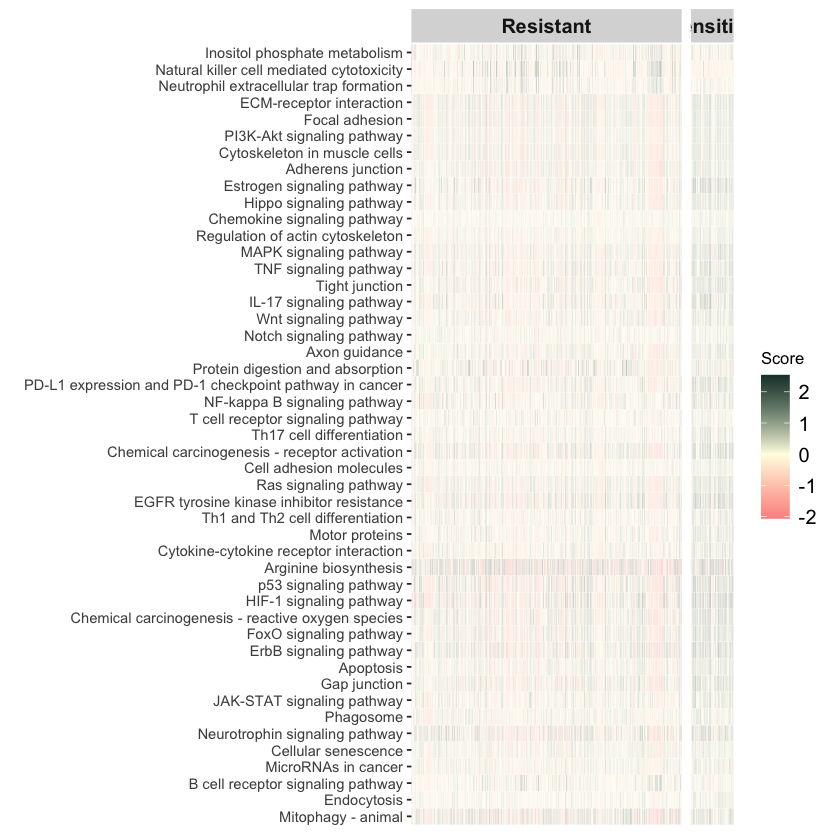

In [11]:
gdsc_experiment_matrix <- read.delim(paste(pathfindR_dir, "GDSC_Experiment_Matrix_EGFRi_Cetuximab_First_Strategy.tsv", sep = "/"))
colnames(gdsc_experiment_matrix)[2:ncol(gdsc_experiment_matrix)] <- sub("^X", "", colnames(gdsc_experiment_matrix)[2:ncol(gdsc_experiment_matrix)])
rownames(gdsc_experiment_matrix) <- gdsc_experiment_matrix$symbol
gdsc_experiment_matrix <- gdsc_experiment_matrix[,-1]
gdsc_experiment_matrix <- as.matrix(gdsc_experiment_matrix)
colnames(gdsc_experiment_matrix) <- as.integer(colnames(gdsc_experiment_matrix))

gdsc_cases_data <- read.delim(paste(pathfindR_dir, "GDSC Cetuximab Samples.tsv", sep ="/"))

filter <- (gdsc_cases_data["Response"] == 0)
cases <- as.character(gdsc_cases_data[filter, "Sample"])

score_matrix <- score_terms(
  enrichment_table = save_filtered,
  exp_mat = gdsc_experiment_matrix,
  cases = cases,
  use_description = TRUE, 
  label_samples = FALSE, 
  case_title = "Resistant", 
  control_title = "Sensitive", 
  low = "#f7797d", 
  mid = "#fffde4", 
  high = "#1f4037" 
)

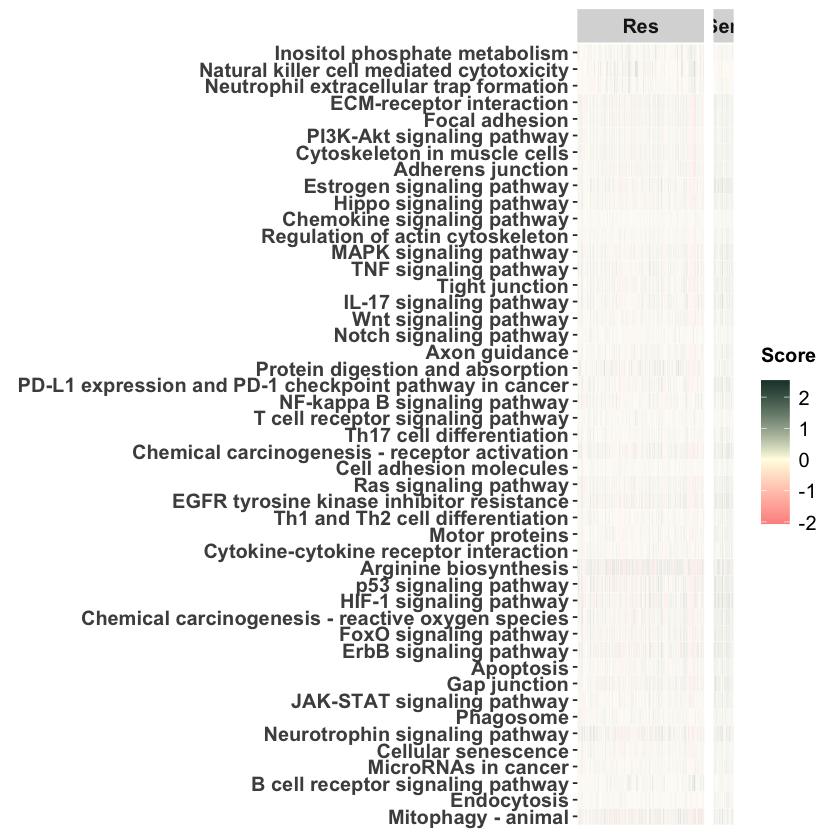

In [12]:
# Generate heatmap and assign it to scores_figure

scores_figure <- plot_scores(
    score_matrix,
    cases = cases,
    label_samples = FALSE,
    case_title = "Res",  
    control_title = "Sen",  
    low = "#f7797d",  
    mid = "#fffde4",  
    high = "#1f4037"  
) +
ggplot2::theme(
    legend.title = ggplot2::element_text(
        size = 12, face = "bold", margin = ggplot2::margin(b = 10)  
    ),
    axis.title.y = ggplot2::element_blank(),          
    axis.text.y = ggplot2::element_text(size = 12, face = "bold"),  
    #legend.text = ggplot2::element_text(size = 12),                 
    #strip.text = ggplot2::element_text(size = 18, face = "bold")   
)


scores_figure

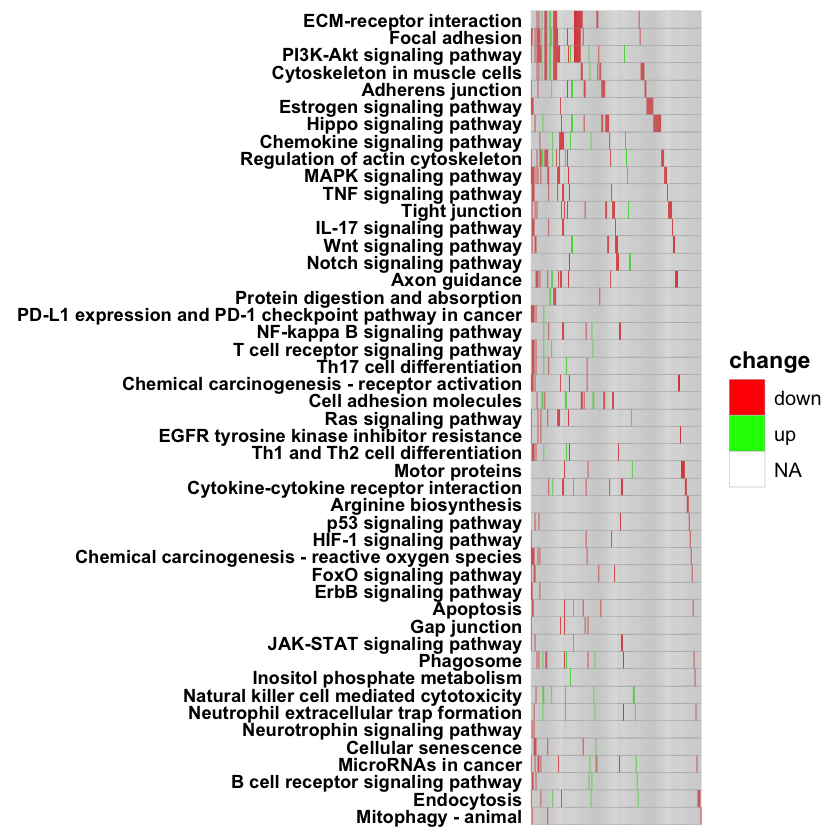

In [14]:
# Generate term-gene heatmap and add a title

term_figure <- term_gene_heatmap(
  save_filtered, 
  num_terms = length(terms_significant),
  use_description = TRUE,
  sort_terms_by_p = TRUE
) +
#ggplot2::ggtitle("EGFR signaling inhibitors (Cetuximab)\nKEGG Pathways, Term-Gene Heatmap\n") +  
ggplot2::theme(
  #plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
  axis.text.x = ggplot2::element_blank(),  
  axis.ticks.x = ggplot2::element_blank(),  
  axis.text.y = ggplot2::element_text(size = 11, face = "bold"),  
  axis.title.x = ggplot2::element_blank(),
  axis.title.y = ggplot2::element_blank(),
  legend.title = ggplot2::element_text(size = 14, face = "bold"),  
  legend.text = ggplot2::element_text(size = 12),                 
  legend.key.size = grid::unit(1.5, "lines")                     
)

term_figure

Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


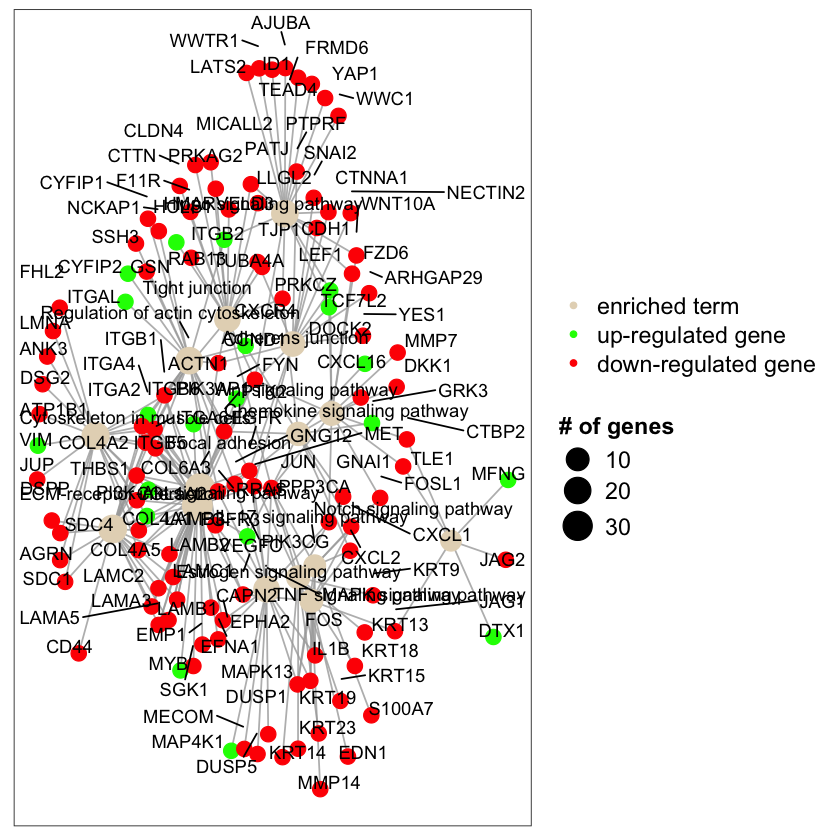

In [15]:
# Generate the term-gene graph and store it in term_gene_figure

term_gene_figure <- term_gene_graph(
  save_filtered, 
  use_description = TRUE,  
  num_terms = 15           
) +
ggforce::theme_no_axes() + 
ggplot2::theme(
    plot.title = ggplot2::element_blank(),  
    plot.subtitle = ggplot2::element_blank(),  
    legend.title = ggplot2::element_text(size = 14, face = "bold"),  
    legend.text = ggplot2::element_text(size = 14)  
) +
ggplot2::scale_size_continuous(name = "# of genes", range = c(4, 8))  

term_gene_figure

Warning message:
“ggrepel: 44 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


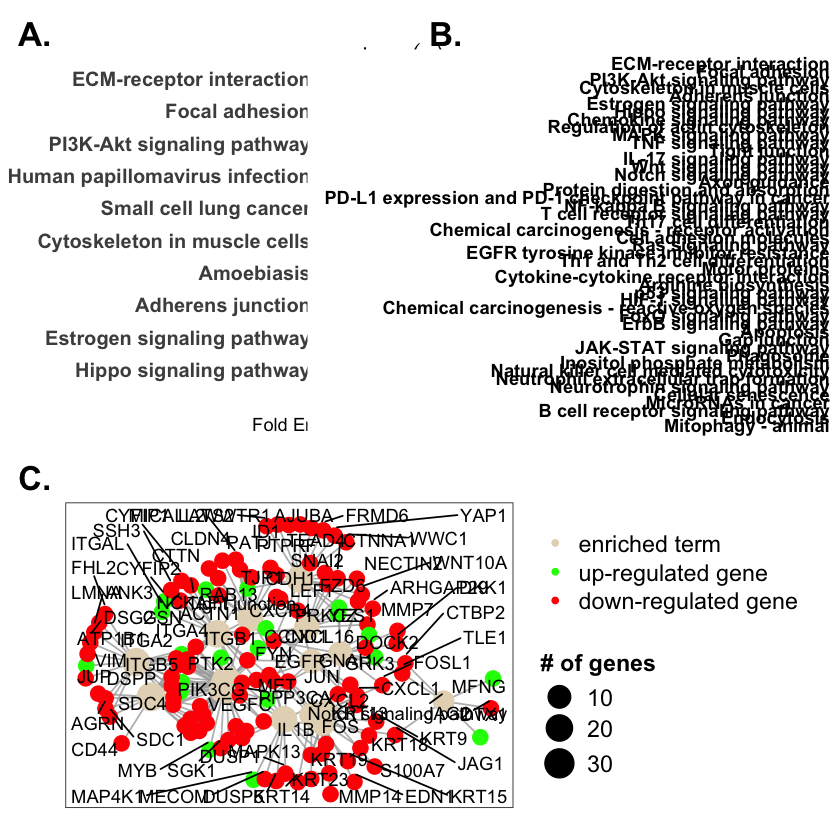

In [16]:
# Define subplot labels manually

plot_a <- fold_enrichment_figure 
plot_b <- term_figure
plot_c <- term_gene_figure

# Create the grid layout
grid_plot <- (wrap_elements(plot_a) + wrap_elements(plot_b)) /
             (wrap_elements(plot_c)) +
  plot_layout(
    widths = c(1, 0.1, 5),  
    heights = c(1.2, 1) 
  ) +
  plot_annotation(
    tag_levels = "A",  
    tag_prefix = "",   
    tag_suffix = "."  
  ) & 
  theme(plot.tag = element_text(face = 'bold', size = 20))

# Save the customized figure
ggsave(
  filename = paste(pathfindR_dir, "KEGG_figure8/Figure 8.png", sep = "/"),
  plot = grid_plot,
  width = 21,   
  height = 12,  
  device = "png"
)

print(grid_plot)